In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### data preparation

In [2]:
x=np.zeros((6,2))
x[0][0]=185
x[0][1]=72
x[1][0]=170
x[1][1]=56
x[2][0]=168
x[2][1]=60
x[3][0]=179
x[3][1]=68
x[4][0]=182
x[4][1]=72
x[5][0]=188
x[5][1]=77

In [3]:
print(x)

[[185.  72.]
 [170.  56.]
 [168.  60.]
 [179.  68.]
 [182.  72.]
 [188.  77.]]


In [4]:
x.shape

(6, 2)

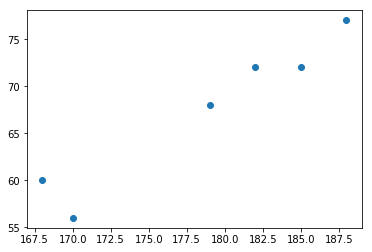

In [5]:
plt.scatter(x[:,0],x[:,1])
plt.show()

##### sorting of data using heap sort acording to their Y coordinate.

In [6]:
def heapsort( aList ):
  # convert aList to heap
  length = len( aList ) - 1
  leastParent = length / 2
  for i in range ( leastParent, -1, -1 ):
    moveDown( aList, i, length )
 
  # flatten heap into sorted array
  for i in range ( length, 0, -1 ):
    if aList[0] > aList[i]:
      swap( aList, 0, i )
      moveDown( aList, 0, i - 1 )
 
 
def moveDown( aList, first, last ):
  largest = 2 * first + 1
  while largest <= last:
    # right child exists and is larger than left child
    if ( largest < last ) and ( aList[largest] < aList[largest + 1] ):
      largest += 1
 
    # right child is larger than parent
    if aList[largest] > aList[first]:
      swap( aList, largest, first )
      # move down to largest child
      first = largest;
      largest = 2 * first + 1
    else:
      return # force exit
 
 
def swap( A, x, y ):
  tmp = A[x]
  A[x] = A[y]
  A[y] = tmp

In [7]:
x[:,1].sort()

In [8]:
print(x)

[[185.  56.]
 [170.  60.]
 [168.  68.]
 [179.  72.]
 [182.  72.]
 [188.  77.]]


In [11]:
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [25]:
k, gapdf = optimalK(x, nrefs=5, maxClusters=5)
print(k)

2


In [26]:
centers=[]

for i in range(k,x.shape[0]-k):
    centers.append(x[i]);
    

In [28]:
print(centers) # coordinates  of the assigned centroid.

[array([168.,  68.]), array([179.,  72.])]


In [35]:
color=['green','red','blue','yellow','orange']

clusters={}

for i in range(k):
    #center = 10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    
    cluster={
         'center':centers[i],
         'points' :points,
         'colour':color[i]
        
    }
    
    clusters[i]=cluster
    
clusters

{0: {'center': array([168.,  68.]), 'points': [], 'colour': 'green'},
 1: {'center': array([179.,  72.]), 'points': [], 'colour': 'red'}}

In [36]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [37]:
# assigning points to clusters(E-step of expectation maximization problem)
# K-Means is the special case of expectation maximization problem
def assign_points_to_clusters(clusters):
    # iterating in every cluster
    for i in range(x.shape[0]):
        dist_of_this_point_from_every_cluster_center = []
        current_point=x[i]
    
    # now iterating in every cluster
        for kx in range(k):
            distance_from_center=distance(current_point,clusters[kx]['center'])
            dist_of_this_point_from_every_cluster_center.append(distance_from_center)
        
        current_cluster=np.argmin(dist_of_this_point_from_every_cluster_center)
        clusters[current_cluster]['points'].append(current_point)
        #print(clusters[current_cluster]['points'])

        
    
    

In [38]:
assign_points_to_clusters(clusters)
print(x.shape[0])

6


In [39]:
def updateClusters(clusters):   # M-step -> we update every cluster center acording to mean of the cluster
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]



def plotclusters(clusters):
    
    for kx in range(k):
        #print(type(clusters[kx]['points']))
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['colour'])
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")
    

    

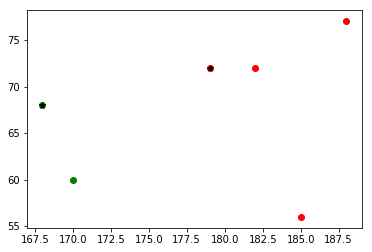

In [40]:
plotclusters(clusters)

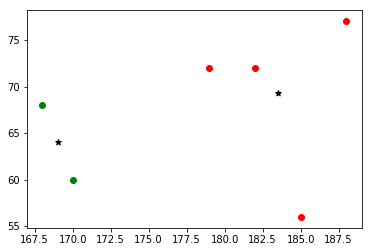

In [43]:
# JUst one iteration to test stability
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

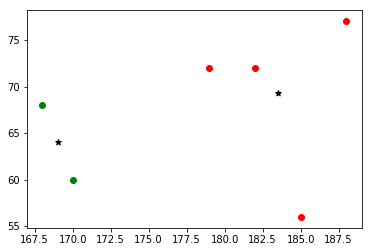

In [44]:
# JUst one iteration to test stability
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

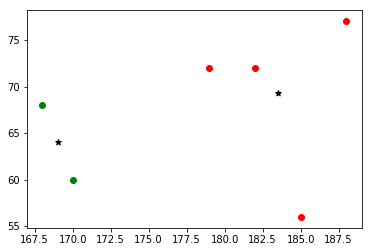

In [45]:
# JUst one iteration to test stability
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)

#### Centroids are shown by black stars after stability